In [1]:
# Modules needed
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt
from zlib import crc32
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [4]:
data = pd.read_csv("data/hour.csv")

In [5]:
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


array([[<AxesSubplot:xlabel='hr', ylabel='hr'>,
        <AxesSubplot:xlabel='temp', ylabel='hr'>,
        <AxesSubplot:xlabel='hum', ylabel='hr'>,
        <AxesSubplot:xlabel='cnt', ylabel='hr'>],
       [<AxesSubplot:xlabel='hr', ylabel='temp'>,
        <AxesSubplot:xlabel='temp', ylabel='temp'>,
        <AxesSubplot:xlabel='hum', ylabel='temp'>,
        <AxesSubplot:xlabel='cnt', ylabel='temp'>],
       [<AxesSubplot:xlabel='hr', ylabel='hum'>,
        <AxesSubplot:xlabel='temp', ylabel='hum'>,
        <AxesSubplot:xlabel='hum', ylabel='hum'>,
        <AxesSubplot:xlabel='cnt', ylabel='hum'>],
       [<AxesSubplot:xlabel='hr', ylabel='cnt'>,
        <AxesSubplot:xlabel='temp', ylabel='cnt'>,
        <AxesSubplot:xlabel='hum', ylabel='cnt'>,
        <AxesSubplot:xlabel='cnt', ylabel='cnt'>]], dtype=object)

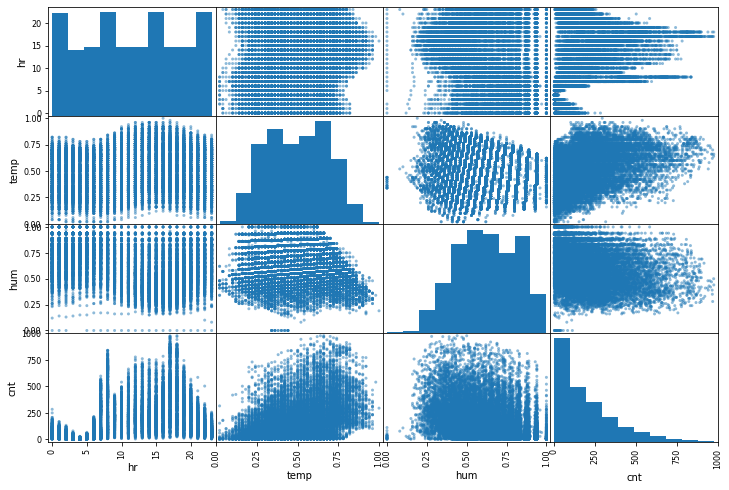

In [6]:
attributes = ["hr", "temp", "hum", "cnt"]
pd.plotting.scatter_matrix(data[attributes], figsize=(12, 8))

Our variables:
- hr (numerical)
- season (categorical)
- workingday (categorical)
- weathersit (categorical)
- temp (numerical)

What we want to predict:
- cnt (numerical)

In [7]:
cat_encoder = OneHotEncoder()

In [8]:
# Encode the categorical variables
season_enc = cat_encoder.fit_transform(data[["season"]])
workingday_enc = cat_encoder.fit_transform(data[["workingday"]])
weathersit_enc = cat_encoder.fit_transform(data[["weathersit"]])

In [9]:
data["season_enc1"] = season_enc.toarray()[:, 0]
data["season_enc2"] = season_enc.toarray()[:, 1]
data["season_enc3"] = season_enc.toarray()[:, 2]
data["season_enc4"] = season_enc.toarray()[:, 3]
data["workingday_enc1"] = workingday_enc.toarray()[:, 0]
data["workingday_enc2"] = workingday_enc.toarray()[:, 1]
data["weathersit_enc1"] = weathersit_enc.toarray()[:, 0]
data["weathersit_enc2"] = weathersit_enc.toarray()[:, 1]
data["weathersit_enc3"] = weathersit_enc.toarray()[:, 2]
data["weathersit_enc4"] = weathersit_enc.toarray()[:, 3]
#data["season_enc"] = [i for i in season_enc.toarray()]
#data["workingday_enc"] = [i for i in workingday_enc.toarray()]
#data["weathersit_enc"] = [i for i in weathersit_enc.toarray()]

In [10]:
data_sub = data[["hr", "season_enc1", "season_enc2", "season_enc3", "season_enc4", "workingday_enc1", "workingday_enc2", "weathersit_enc1", "weathersit_enc2", "weathersit_enc3", "weathersit_enc4", "temp", "cnt"]]
#data_sub = data[["hr", "season", "workingday", "weathersit", "temp", "cnt"]]

In [11]:
# Split the data
data_train, data_test = train_test_split(data_sub, test_size=0.2, random_state=42)

In [12]:
# Get the x and Y values
data_train_x = data_train[["hr", "season_enc1", "season_enc2", "season_enc3", "season_enc4", "workingday_enc1", "workingday_enc2", "weathersit_enc1", "weathersit_enc2", "weathersit_enc3", "weathersit_enc4", "temp"]]
data_train_Y = data_train[["cnt"]]
data_test_x = data_test[["hr", "season_enc1", "season_enc2", "season_enc3", "season_enc4", "workingday_enc1", "workingday_enc2", "weathersit_enc1", "weathersit_enc2", "weathersit_enc3", "weathersit_enc4", "temp"]]
data_test_Y = data_test[["cnt"]]

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(data_train_x, data_train_Y)

LinearRegression()

In [14]:
preds = lin_reg.predict(data_test_x)
print("Predictions:", preds)

Predictions: [[347.    ]
 [168.3125]
 [ 90.    ]
 ...
 [ 65.0625]
 [221.    ]
 [238.1875]]


In [15]:
print("Labels:", data_test_Y.to_numpy())

Labels: [[425]
 [ 88]
 [  4]
 ...
 [ 98]
 [266]
 [267]]


In [16]:
loss = np.mean(np.abs(preds-data_test_Y.to_numpy()))/data_test_Y.to_numpy().shape[0]

In [17]:
loss

0.03139302620567005

In [18]:
lin_reg = RandomForestRegressor()
lin_reg.fit(data_train_x, data_train_Y)

preds = lin_reg.predict(data_test_x)
print("Predictions:", preds)

<ipython-input-18-35df40eda244>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lin_reg.fit(data_train_x, data_train_Y)


Predictions: [345.42714286  62.97335714   6.08902103 ...  76.79783333 300.80166667
 391.50831746]


In [19]:
print("Labels:", data_test_Y.to_numpy())

Labels: [[425]
 [ 88]
 [  4]
 ...
 [ 98]
 [266]
 [267]]


In [20]:
loss = np.mean(np.abs(preds-data_test_Y.to_numpy()))/data_test_Y.to_numpy().shape[0]

In [21]:
loss

0.05281855142769392